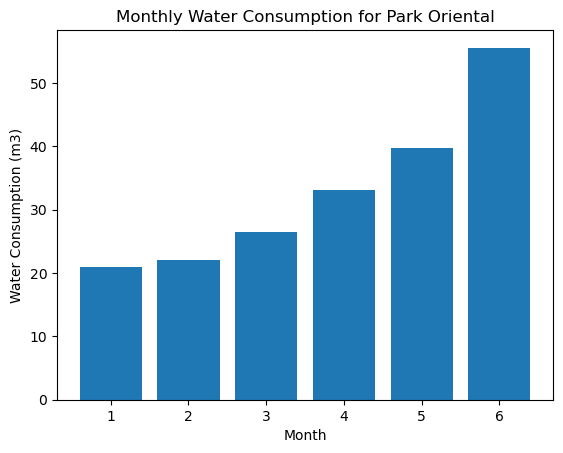

Average Monthly Costs for Park Oriental: 
Year
2023    813.68451
2024    469.60200
Name: Consumption, dtype: float64
Park with highest consumption:  Cidade
Park with lowest consumption:  ArcaAgua

Statistical Analysis for Park with highest consumption:
count    456.000000
mean     116.240589
std       71.724871
min        0.000000
25%       68.581976
50%       85.995000
75%      151.782967
max      922.654688
Name: Consumption, dtype: float64

Statistical Analysis for Park with lowest consumption:
count    456.000000
mean       8.995993
std        4.852369
min        0.000000
25%        5.381848
50%        6.771855
75%       11.705398
max       49.218750
Name: Consumption, dtype: float64


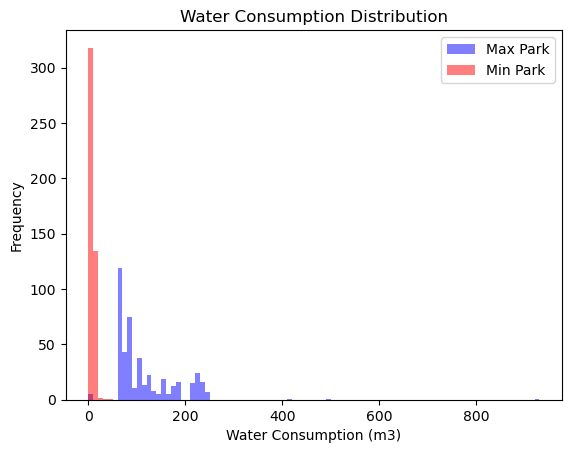

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo CSV
data = pd.read_csv('water_consumption.csv', sep=';', decimal=',')

def monthly_water_consumption(barplot_specs):
    # Filtro dos dados baseado nas especificações
    filtered_data = data[(data['Year'] == barplot_specs['year']) &
                         (data['Month'].between(barplot_specs['StartMonth'], barplot_specs['EndMonth'])) &
                         (data['Park'] == barplot_specs['park_id'])]

    # Criação do barplot
    plt.bar(filtered_data['Month'], filtered_data['Consumption'])
    plt.xlabel('Month')
    plt.ylabel('Water Consumption (m3)')
    plt.title('Monthly Water Consumption for Park {}'.format(barplot_specs['park_id']))
    plt.show()

def monthly_costs(num_parks, park_id):
    # Filtro dos dados para calcular os custos mensais de consumo de água
    filtered_data = data[data['Park'] == park_id].groupby(['Year', 'Month'])['Consumption'].sum()
    avg_costs = filtered_data * 0.7  # custo por m3
    avg_costs = avg_costs.apply(lambda x: x if x <= 1000 else x + (x - 1000) * 0.15)  # cálculo do custo com taxa adicional
    avg_costs = avg_costs.groupby('Year').mean()

    print("Average Monthly Costs for Park {}: \n{}".format(park_id, avg_costs.tail(num_parks)))

def statistical_analysis():
    # Cálculos estatísticos para os parques com maior e menor consumo de água
    grouped_data = data.groupby('Park')['Consumption'].describe()
    max_consumption_park = grouped_data[grouped_data['max'] == grouped_data['max'].max()].index[0]
    min_consumption_park = grouped_data[grouped_data['min'] == grouped_data['min'].min()].index[0]

    print("Park with highest consumption: ", max_consumption_park)
    print("Park with lowest consumption: ", min_consumption_park)

    max_park_data = data[data['Park'] == max_consumption_park]['Consumption']
    min_park_data = data[data['Park'] == min_consumption_park]['Consumption']

    # Cálculos estatísticos
    max_park_stats = max_park_data.describe()
    min_park_stats = min_park_data.describe()

    print("\nStatistical Analysis for Park with highest consumption:")
    print(max_park_stats)
    print("\nStatistical Analysis for Park with lowest consumption:")
    print(min_park_stats)

    # Construção de histogramas
    plt.hist(max_park_data, bins=[x for x in range(0, int(max_park_data.max()) + 10, 10)], alpha=0.5, label='Max Park', color='blue')
    plt.hist(min_park_data, bins=[x for x in range(0, int(min_park_data.max()) + 10, 10)], alpha=0.5, label='Min Park', color='red')
    plt.xlabel('Water Consumption (m3)')
    plt.ylabel('Frequency')
    plt.title('Water Consumption Distribution')
    plt.legend(loc='upper right')
    plt.show()

# Especificações para o barplot mensal
barplot_specs = {
    'year': 2023,
    'StartMonth': 1,
    'EndMonth': 6,
    'park_id': 'Oriental'
}

# Chamada das funções
monthly_water_consumption(barplot_specs)
monthly_costs(2, 'Oriental')
statistical_analysis()
